Text(0.5, 1.0, 'Beer Sales')

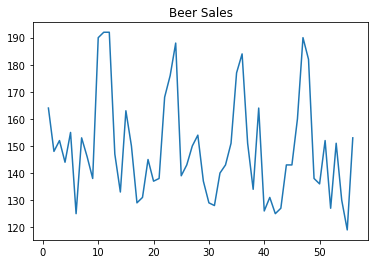

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

file = r'data_set/beer.txt'
df = pd.read_csv(file)

X = np.linspace(1, len(df), len(df))
y = df['Sales']

plt.figure()
plt.plot(X, y)
plt.title('Beer Sales')

In [19]:
X = np.reshape(X, (len(df), 1))
lm = LinearRegression()
lm.fit(X, y)
print('Coefficients: {0}'.format(lm.coef_))
print('Total model: y = {0} + {1} X'.format(lm.intercept_, lm.coef_))
print('Variance score (R^2): {0:.2f}'.format(lm.score(X, y)))

Coefficients: [-0.21425154]
Total model: y = 155.40974025974026 + [-0.21425154] X
Variance score (R^2): 0.03


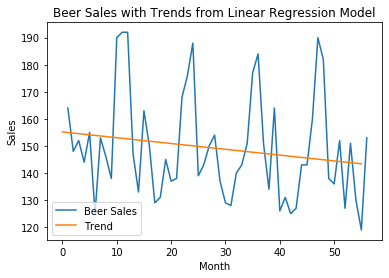

In [20]:
df.sort_index()
trend = lm.predict(X)
plt.figure()
plt.plot(X, y, label='Beer Sales')  # 实际值
plt.plot(trend, label='Trend')  # 预测值
plt.legend()
plt.title('Beer Sales with Trends from Linear Regression Model')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show(block=False)

In [21]:
# SSE
sse = np.sum(np.power(y - trend, 2), axis=0)
print(sse)

20464.267840054687


In [22]:
# ACF自相差性
df['residuals'] = y - trend
print(df['residuals'])

0      8.804511
1     -6.981237
2     -2.766986
3    -10.552734
4      0.661517
5    -29.124231
6     -0.909979
7     -7.695728
8    -15.481476
9     36.732775
10    38.947027
11    39.161278
12    -5.624470
13   -19.410219
14    10.804033
15    -1.981716
16   -22.767464
17   -20.553213
18    -6.338961
19   -14.124710
20   -12.910458
21    17.303794
22    25.518045
23    37.732297
24   -11.053452
25    -6.839200
26     0.375051
27     4.589303
28   -12.196446
29   -19.982194
30   -20.767943
31    -8.553691
32    -5.339440
33     2.874812
34    29.089064
35    36.303315
36     3.517567
37   -13.268182
38    16.946070
39   -20.839679
40   -15.625427
41   -21.411176
42   -19.196924
43    -2.982673
44    -2.768421
45    14.445830
46    44.660082
47    36.874334
48    -6.911415
49    -8.697163
50     7.517088
51   -17.268660
52     6.945591
53   -13.840157
54   -24.625906
55     9.588346
Name: residuals, dtype: float64


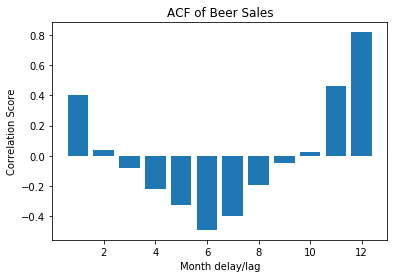

In [24]:
acf_value = [df['residuals'].autocorr(i) for i in range(1, 13)]
plt.figure()
plt.bar(np.arange(1, 13), acf_value)
plt.title('ACF of Beer Sales')
plt.xlabel('Month delay/lag')
plt.ylabel('Correlation Score')
plt.show(block=False)

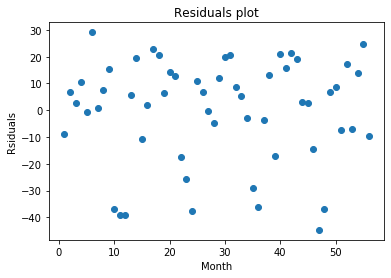

In [26]:
# 检查残差图
plt.figure()
plt.title('Residuals plot')
plt.scatter(X, trend - y)
plt.xlabel('Month')
plt.ylabel('Rsiduals')
plt.show(block=False)

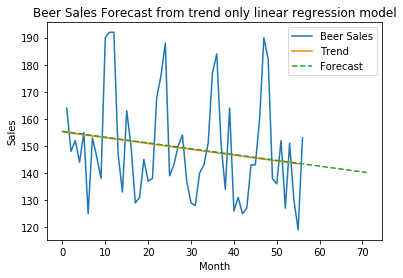

In [32]:
# 使用原始数据做简单线性回归的预测
forecast = lm.predict(np.reshape(np.arange(72), (72, 1)))
plt.figure()
plt.plot(X, y, label='Beer Sales')
plt.plot(trend, label='Trend')
plt.plot(forecast, linestyle='--', label='Forecast')
plt.legend()
plt.title('Beer Sales Forecast from trend only linear regression model')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show(block=False)

In [36]:
# 移动平均，对季节性进行平滑
T = df.rolling(2, center=True).mean().rolling(12, center=True).mean()
# 计算调整后的趋势预测
lm.fit(X[7:51], T['Sales'].iloc[7:51])
linear_trend = lm.predict(np.reshape(np.arange(72), (72, 1)))
# 计算调整后的趋势预测
S_additive = df['Sales'] - T['Sales']
safe_S = np.nan_to_num(S_additive)
monthly_S = np.reshape(np.concatenate((safe_S, [0, 0, 0, 0]), axis=0), (5, 12))
monthly_avg = np.mean(monthly_S[1:4, :], axis=0)
tiled_avg = np.tile(monthly_avg, 6)

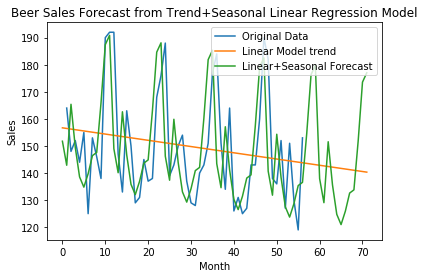

In [37]:
# 得到季节性调整后的预测
linear_seasonal_forecast = linear_trend + tiled_avg
plt.figure()
plt.plot(X, y, label='Original Data')
plt.plot(linear_trend, label='Linear Model trend')
plt.plot(linear_seasonal_forecast, label='Linear+Seasonal Forecast')
plt.legend()
plt.title('Beer Sales Forecast from Trend+Seasonal Linear Regression Model')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show(block=True)